In [14]:
import pandas as pd

In [34]:
df = pd.read_csv('customer_segments LRFM.csv')
df 



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,R_Score,Frequency,Monetary,F_Score,M_Score,Segment,LastPurchase,Length,Length_Category,LengthCategory,Total_Purchases,Frequency_Category,Monetary_Category,Length_Score,Recency_Score,Monetary_Score,Frequency_Score,LRFM_Score
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2,22,1617,3,3,Top Tier,2014-11-03,848,Long (>2y),Long,22,High,High,3,2,3,3,3233
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,4,27,1,1,Botfrag,2014-11-23,298,Short (<1y),Medium,4,Low,Low,1,2,1,1,1211
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3,20,776,3,2,Promising,2014-12-05,497,Medium (1-2y),Long,20,High,Medium,2,1,2,3,2132
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3,6,53,1,1,Botfrag,2014-12-05,324,Short (<1y),Medium,6,Low,Low,1,1,1,1,1111
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,14,422,2,2,Middle Class,2014-09-28,346,Short (<1y),Medium,14,Medium,Medium,1,3,2,2,1322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2,16,1341,2,3,Big Spenders,2014-11-15,566,Medium (1-2y),Long,16,Medium,High,2,2,3,2,2223
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2,15,444,2,2,Middle Class,2014-11-05,204,Short (<1y),Medium,15,Medium,Medium,1,2,2,2,1222
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1,18,1241,3,3,Top of the Top,2014-10-01,340,Short (<1y),Medium,18,High,High,1,3,3,3,1333
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,3,21,843,3,3,Promising,2014-12-23,341,Short (<1y),Medium,21,High,High,1,1,3,3,1133


In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [29]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


In [62]:
cutoff_date = pd.to_datetime('2014-12-31')
df['Length'] = (cutoff_date - df['Dt_Customer']).dt.days


Length_Category
Short (<1y)       557
Medium (1-2y)    1189
Long (>2y)        494
Name: count, dtype: int64


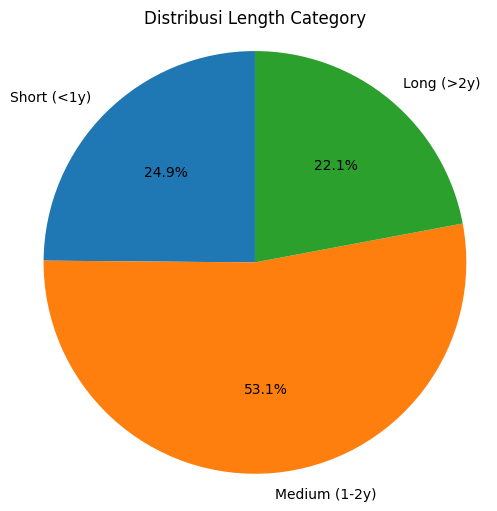

In [64]:
# Buat bins baru dan label
bins = [0, 364, 729, df['Length'].max()]
labels = ['Short (<1y)', 'Medium (1-2y)', 'Long (>2y)']

# Terapkan kategori Length
df['Length_Category'] = pd.cut(df['Length'], bins=bins, labels=labels, include_lowest=True)

# Cek jumlah per kategori
length_counts = df['Length_Category'].value_counts().sort_index()
print(length_counts)

# Pie chart distribusi kategori
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Length Category')
plt.axis('equal')  # agar pie chart bulat
plt.show()


Distribusi Frequency Category:
Frequency_Category
Low       843
Medium    737
High      660
Name: count, dtype: int64


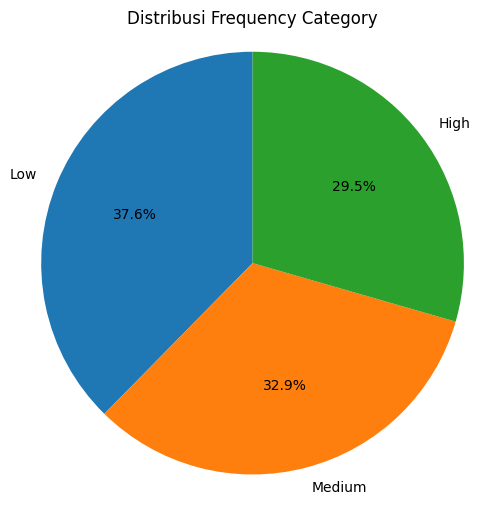

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hitung total pembelian
df['Total_Purchases'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases']
)

# 2. Klasifikasi Frequency ke dalam 3 kategori (tertile)
df['Frequency_Category'] = pd.qcut(df['Total_Purchases'], q=3, labels=['Low', 'Medium', 'High'])

# 3. Mapping Frequency_Category ke Frequency_Score
score_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Frequency_Score'] = df['Frequency_Category'].map(score_map)

# 4. Cek distribusi
freq_counts = df['Frequency_Category'].value_counts().sort_index()
print("Distribusi Frequency Category:")
print(freq_counts)

# 5. Visualisasi pie chart
plt.figure(figsize=(6, 6))
plt.pie(freq_counts, labels=freq_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Frequency Category')
plt.axis('equal')
plt.show()


In [67]:
# Klasifikasi Monetary menjadi 3 bagian: Low, Medium, High
df['Monetary_Category'] = pd.qcut(df['Monetary'], q=3, labels=['Low', 'Medium', 'High'])


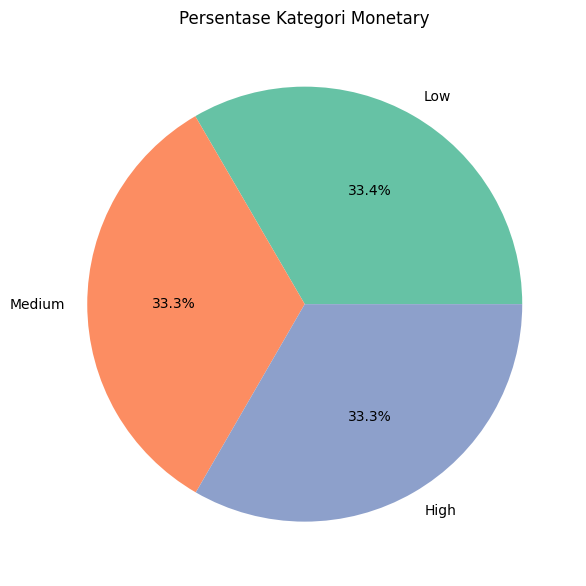

In [70]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(monetary_counts.values, labels=monetary_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Persentase Kategori Monetary')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# 1. Recency_Score (manual logic)
def recency_score(val):
    if val <= 30:
        return 3
    elif val <= 60:
        return 2
    else:
        return 1

df['Recency_Score'] = df['Recency'].apply(recency_score)

# 2. Length_Score dari Length_Category
length_map = {
    'Short': 1,
    'Medium': 2,
    'Long': 3
}
df['Length_Score'] = df['Length_Category'].map(length_map)

# 3. Frequency_Score dari Total_Purchases menggunakan qcut
df['Frequency_Score'] = pd.qcut(df['Total_Purchases'], 3, labels=[1, 2, 3])

# 4. Monetary_Score dari Monetary menggunakan qcut
df['Monetary_Score'] = pd.qcut(df['Monetary'], 3, labels=[1, 2, 3])


Distribusi Recency Category:
Recency_Category
High      746
Low       763
Medium    731
Name: count, dtype: int64


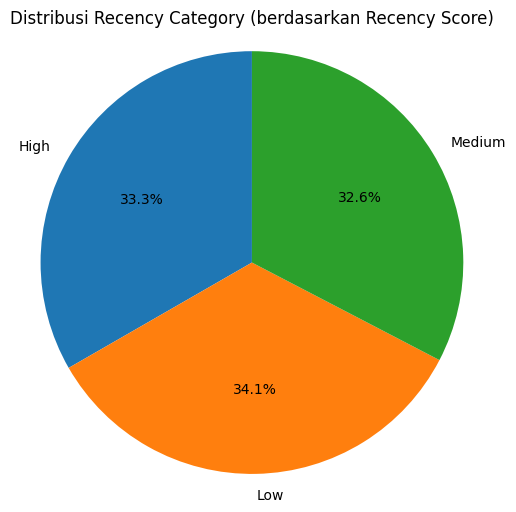

In [25]:
# 1. Mapping Recency_Score ke Recency_Category
recency_category_map = {
    3: 'High',
    2: 'Medium',
    1: 'Low'
}
df['Recency_Category'] = df['Recency_Score'].map(recency_category_map)

# 2. Tampilkan tabel distribusi
recency_dist = df['Recency_Category'].value_counts().sort_index()
print("Distribusi Recency Category:")
print(recency_dist)

# 3. Visualisasi pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(recency_dist, labels=recency_dist.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Recency Category (berdasarkan Recency Score)')
plt.axis('equal')
plt.show()


In [77]:
print(df[['Length', 'Recency', 'Frequency', 'Monetary']].describe())
print(df['Segment'].value_counts())


            Length      Recency    Frequency     Monetary
count  2240.000000  2240.000000  2240.000000  2240.000000
mean    538.582143    49.109375    12.537054   605.798214
std     202.122512    28.962453     7.205741   602.249288
min     185.000000     0.000000     0.000000     5.000000
25%     365.750000    24.000000     6.000000    68.750000
50%     540.500000    49.000000    12.000000   396.000000
75%     714.000000    74.000000    18.000000  1045.500000
max     884.000000    99.000000    32.000000  2525.000000
Segment
Top of the Top    2240
Name: count, dtype: int64


In [23]:
def segment_customer(row):
    total_score = (
        int(row['Length_Score']) +
        int(row['Recency_Score']) +
        int(row['Frequency_Score']) +
        int(row['Monetary_Score'])
    )

    # 1. Top of the Top: Skor total paling tinggi
    if total_score >= 12:
        return 'Top of the Top'

    # 2. Big Spenders: Nilai besar tapi frekuensi rendah
    elif row['Monetary_Score'] == 3 and row['Frequency_Score'] <= 2 and total_score < 12:
        return 'Big Spenders'

    # 3. Top Tier: Loyal & sering beli
    elif row['Frequency_Score'] == 3 and row['Length_Score'] == 3 and total_score < 12:
        return 'Top Tier'

    # 4. Promising: Baru transaksi dan cukup aktif
    elif row['Recency_Score'] == 1 and row['Frequency_Score'] >= 2 and total_score < 11:
        return 'Promising'

    # 5. At Risk: Pelanggan lama tapi sudah lama tidak transaksi
    elif row['Recency_Score'] == 3 and row['Length_Score'] >= 2 and total_score < 11:
        return 'At Risk'

    # 6. Middle Class: Skor menengah
    elif total_score >= 7:
        return 'Middle Class'

    # 7. Botfrag: Skor cukup rendah tapi masih aktif sedikit
    else:
        return 'Botfrag'

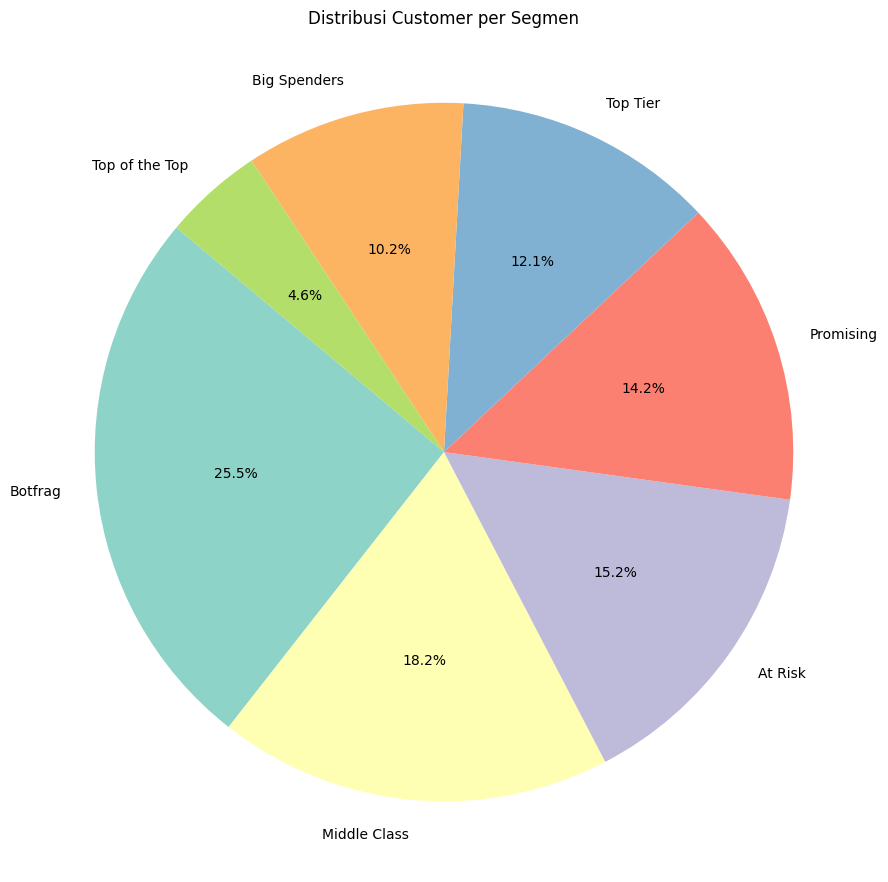

In [24]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(9, 9))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Distribusi Customer per Segmen')
plt.axis('equal')
plt.tight_layout()

plt.show()


In [122]:
df.to_csv('customer_segments LRFM.csv', index=False)


In [116]:
df['LRFM_Score'] = (
    df['Length_Score'].astype(str) +
    df['Recency_Score'].astype(str) +
    df['Frequency_Score'].astype(str) +
    df['Monetary_Score'].astype(str)
)
df.drop(columns=['RFM_Score'], inplace=True)


/var/folders/3d/nwkkh91j2kn5dq8xnpwchkrm0000gn/T/ipykernel_7735/1532488613.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='Segment', y='Count', palette='Set2')


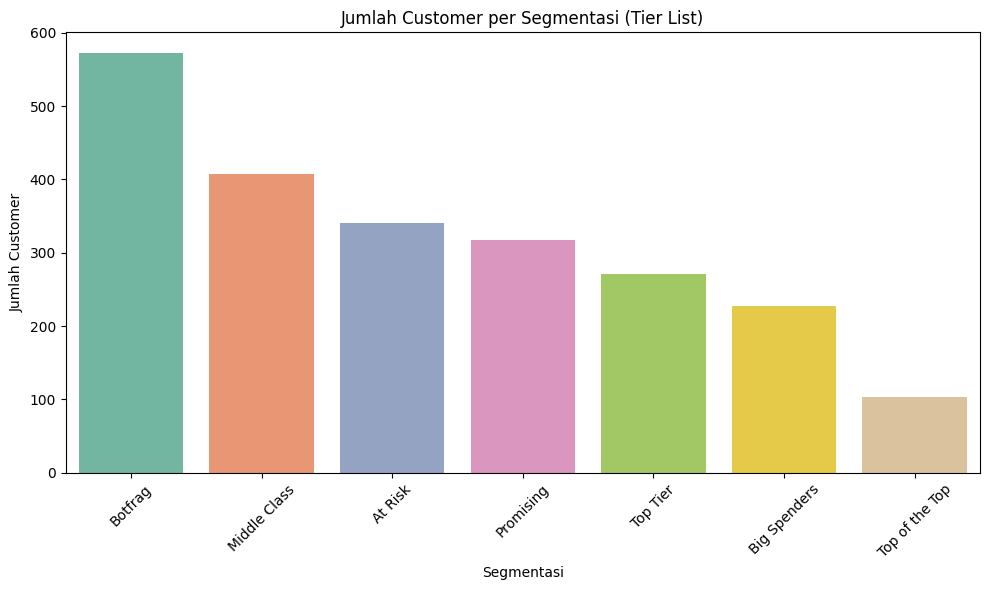

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah customer per segmentasi
segment_counts = df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Urutkan segmentasi dari count tertinggi
segment_counts = segment_counts.sort_values(by='Count', ascending=False)

# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_counts, x='Segment', y='Count', palette='Set2')
plt.title('Jumlah Customer per Segmentasi (Tier List)')
plt.xlabel('Segmentasi')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Buat tabel kategori Recency
recency_categories = pd.DataFrame({
    'Recency_Score': [3, 2, 1],
    'Recency_Category': ['High', 'Medium', 'Low'],
    'Keterangan': [
        'Pelanggan sangat baru, terakhir beli ≤ 30 hari',
        'Pelanggan cukup baru, terakhir beli antara 31–60 hari',
        'Pelanggan lama, terakhir beli > 60 hari'
    ]
})

# Tampilkan tabel
print(recency_categories)


   Recency_Score Recency_Category  \
0              3             High   
1              2           Medium   
2              1              Low   

                                          Keterangan  
0     Pelanggan sangat baru, terakhir beli ≤ 30 hari  
1  Pelanggan cukup baru, terakhir beli antara 31–...  
2            Pelanggan lama, terakhir beli > 60 hari  


In [33]:
df.to_csv('customer_segments LRFM', index=False)


In [35]:
from datetime import datetime

# 1. Hitung umur (misalnya sekarang tahun 2025)
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# 2. Hitung rata-rata umur tiap segment
avg_age_per_segment = df.groupby('Segment')['Age'].mean().reset_index()

# 3. Tampilkan hasil
print(avg_age_per_segment)


          Segment        Age
0         At Risk  55.991176
1    Big Spenders  58.657895
2         Botfrag  53.335664
3    Middle Class  56.301471
4       Promising  57.273585
5        Top Tier  58.066421
6  Top of the Top  58.601942
